In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

sns.set()
sns.set_style("whitegrid")
colors = sns.color_palette("colorblind", 16)

DATA_FOLDER = '../data/raw/'

/opt/miniconda3/envs/ml_project_2/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Cryptos

Periods: 2017-11-09 -> 2022-12-13 

### Bitcoin

In [2]:
df = pd.read_csv(DATA_FOLDER+'cryptos/'+'{}.csv'.format('BTC-USD'))
df['date'] = pd.to_datetime(df.date)
df = df[['date','open']]
df.set_index('date', inplace=True)
df.sort_index(inplace=True)
df["log_return"] = np.log(df["open"] / df["open"].shift(1))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)


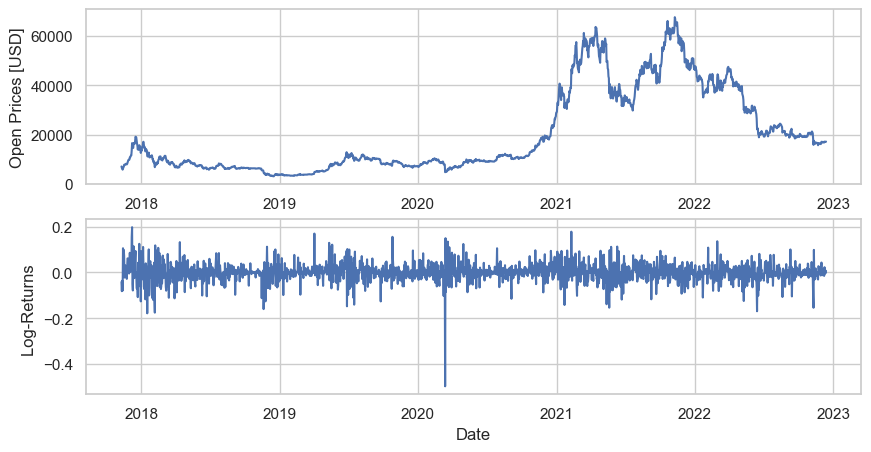

In [3]:
fig, axs = plt.subplots(2, figsize=(10, 5))
axs[0].plot(df.open)
axs[0].set_ylabel('Open Prices [USD]')
axs[1].plot(df.log_return)
axs[1].set_ylabel('Log-Returns ')

plt.xlabel('Date')
plt.show()

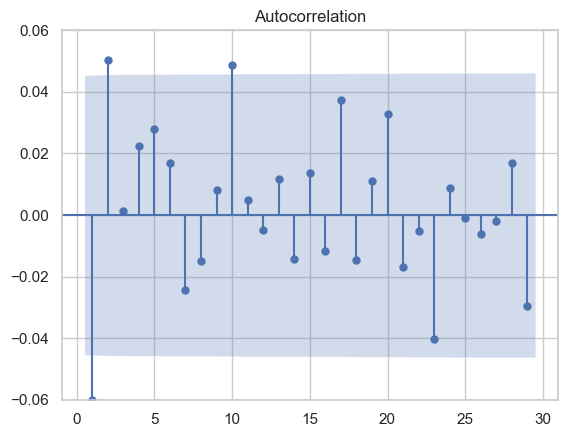

In [4]:
sm.graphics.tsa.plot_acf(df.log_return, lags=np.arange(1, 30))
plt.ylim([-0.06,0.06])
plt.show()

### Ether

In [5]:
df = pd.read_csv(DATA_FOLDER+'cryptos/'+'{}.csv'.format('ETH-USD'))
df['date'] = pd.to_datetime(df.date)
df = df[['date','open']]
df.set_index('date', inplace=True)
df.sort_index(inplace=True)
df["log_return"] = np.log(df["open"] / df["open"].shift(1))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

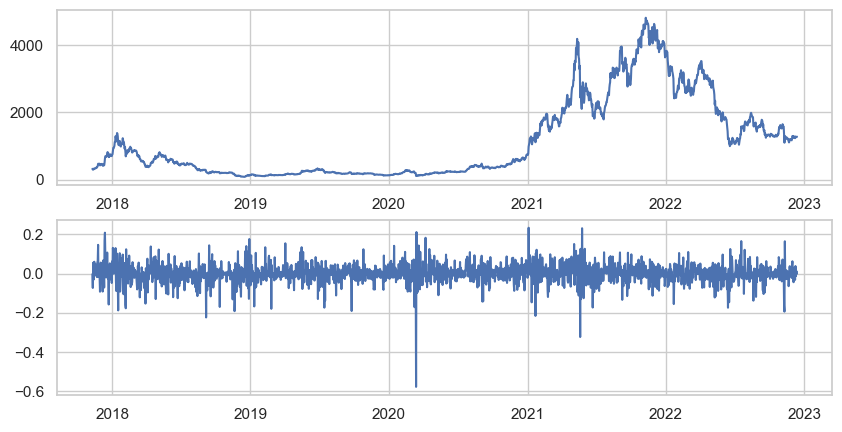

In [6]:
fig, axs = plt.subplots(2, figsize=(10, 5))
axs[0].plot(df.open)
axs[1].plot(df.log_return)
plt.show()

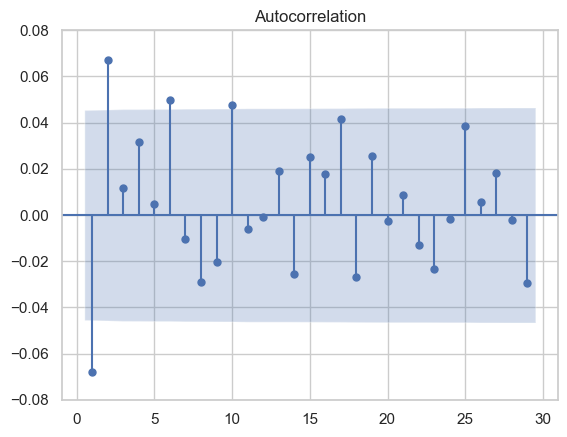

In [7]:
sm.graphics.tsa.plot_acf(df.log_return, lags=np.arange(1, 30))
plt.ylim([-0.08,0.08])
plt.show()

### Ripple

In [8]:
df = pd.read_csv(DATA_FOLDER+'cryptos/'+'{}.csv'.format('XRP-USD'))
df['date'] = pd.to_datetime(df.date)
df = df[['date','open']]
df.set_index('date', inplace=True)
df.sort_index(inplace=True)
df["log_return"] = np.log(df["open"] / df["open"].shift(1))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

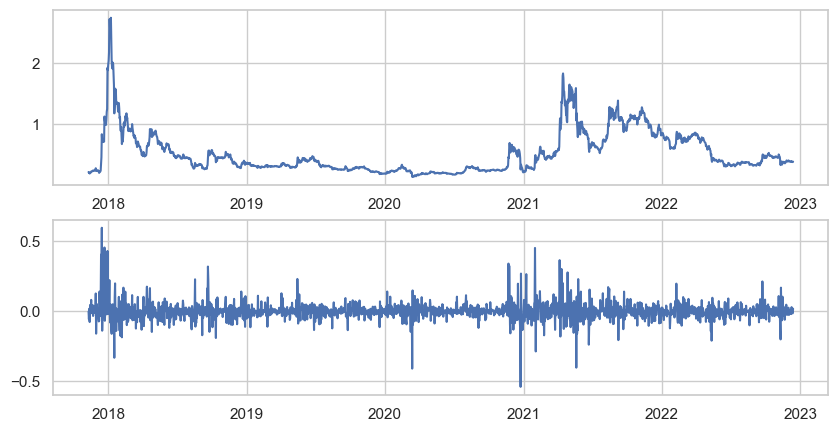

In [9]:
fig, axs = plt.subplots(2, figsize=(10, 5))
axs[0].plot(df.open)
axs[1].plot(df.log_return)
plt.show()

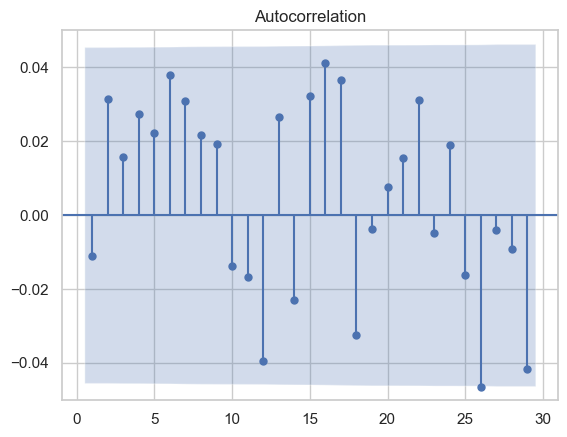

In [10]:
sm.graphics.tsa.plot_acf(df.log_return, lags=np.arange(1, 30))
plt.ylim([-0.05,0.05])
plt.show()

# Commodities

Periods: 2012-12-13 -> 2022-12-09 

### Gold

In [11]:
df = pd.read_csv(DATA_FOLDER+'commodities/'+'{}.csv'.format('LBMA-GOLD'))
df.drop(columns=['USD (PM)', 'GBP (AM)', 'GBP (PM)', 'EURO (AM)', 'EURO (PM)'], inplace=True)
df.rename(columns={'USD (AM)':'Price'}, inplace=True)
df['Date'] = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df["log_return"] = np.log(df["Price"] / df["Price"].shift(1))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

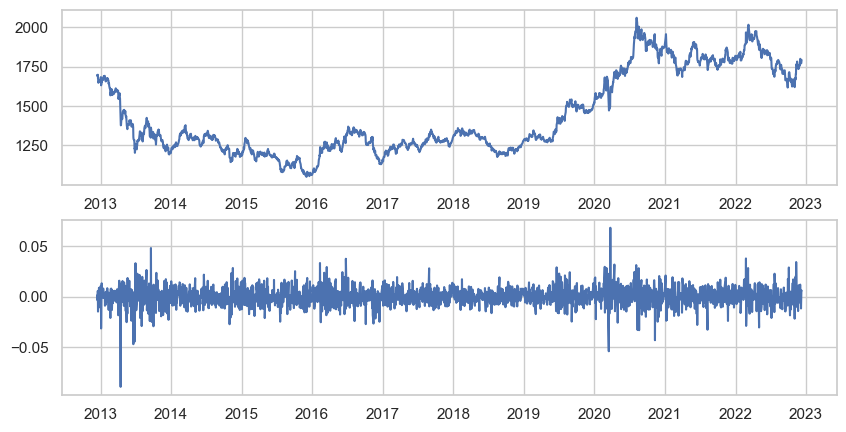

In [12]:
fig, axs = plt.subplots(2, figsize=(10, 5))
axs[0].plot(df.Price)
axs[1].plot(df.log_return)
plt.show()

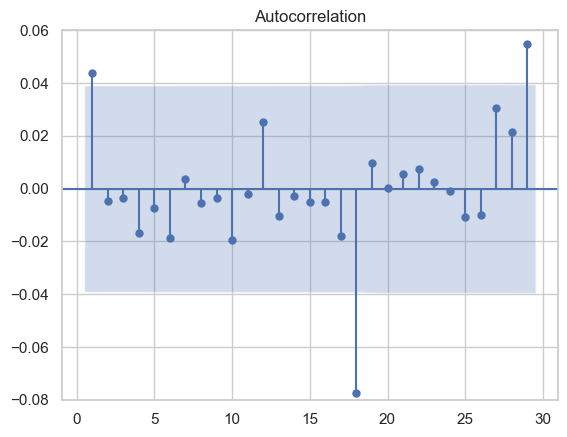

In [13]:
sm.graphics.tsa.plot_acf(df.log_return, lags=np.arange(1, 30))
plt.ylim([-0.08,0.06])
plt.show()

### Natural gas

In [14]:
df = pd.read_csv(DATA_FOLDER+'commodities/'+'{}.csv'.format('NYMEX-NG'))
df = df[['Date','Open']]
df['Date'] = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df["log_return"] = np.log(df["Open"] / df["Open"].shift(1))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

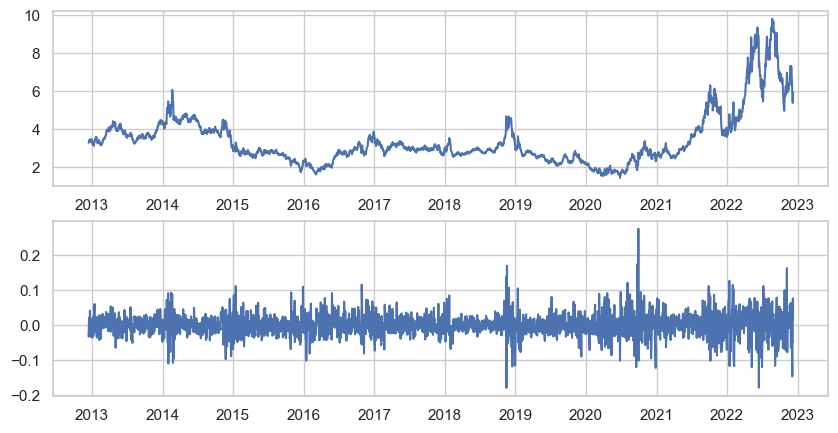

In [15]:
fig, axs = plt.subplots(2, figsize=(10, 5))
axs[0].plot(df.Open)
axs[1].plot(df.log_return)
plt.show()

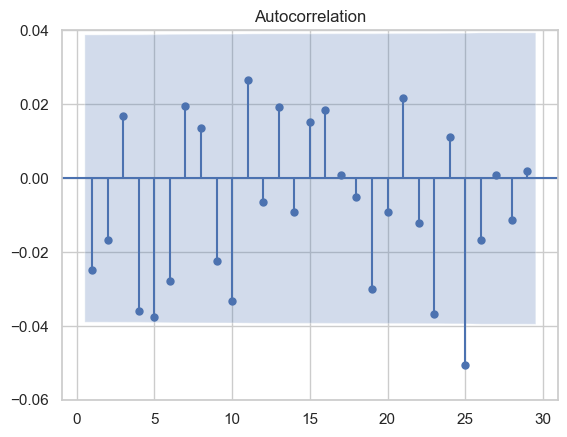

In [16]:
sm.graphics.tsa.plot_acf(df.log_return, lags=np.arange(1, 30))
plt.ylim([-0.06,0.04])
plt.show()

### Oil

In [17]:
df = pd.read_csv(DATA_FOLDER+'commodities/'+'{}.csv'.format('OPEC-ORB'))
df.rename(columns={'Value':'Price'}, inplace=True)
df['Date'] = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df["log_return"] = np.log(df["Price"] / df["Price"].shift(1))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

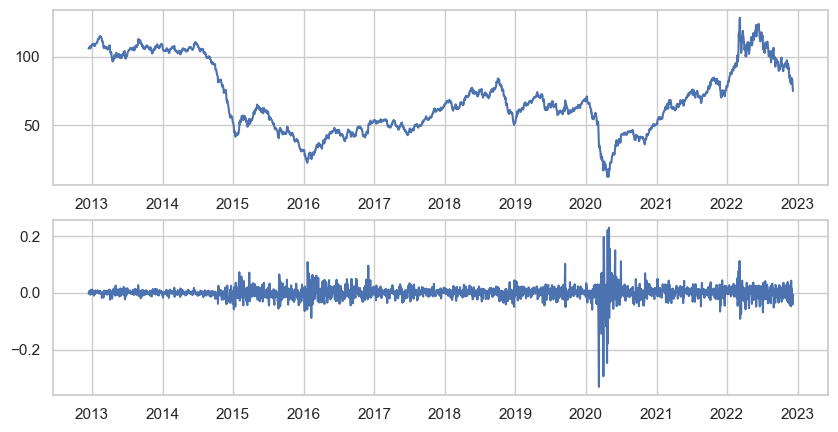

In [18]:
fig, axs = plt.subplots(2, figsize=(10, 5))
axs[0].plot(df.Price)
axs[1].plot(df.log_return)
plt.show()

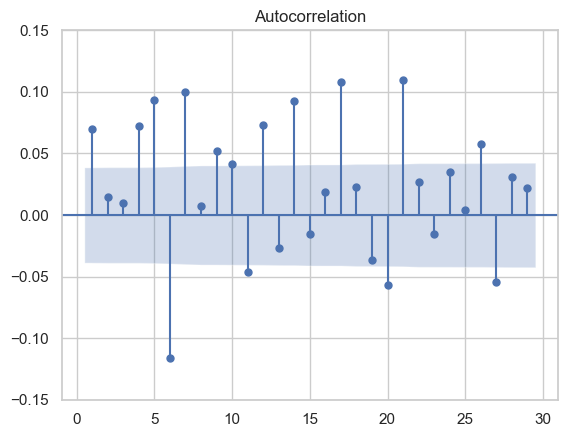

In [19]:
sm.graphics.tsa.plot_acf(df.log_return, lags=np.arange(1, 30))
plt.ylim([-0.15,0.15])
plt.show()

# Stock market index

Periods: 2012-12-13 -> 2022-12-12 

### S&P 500

In [20]:
df = pd.read_csv(DATA_FOLDER+'stock_market_index/'+'{}.csv'.format('SP500'))
df = df[['Date','Open']]
df['Date'] = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df["log_return"] = np.log(df["Open"] / df["Open"].shift(1))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

/opt/miniconda3/envs/ml_project_2/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


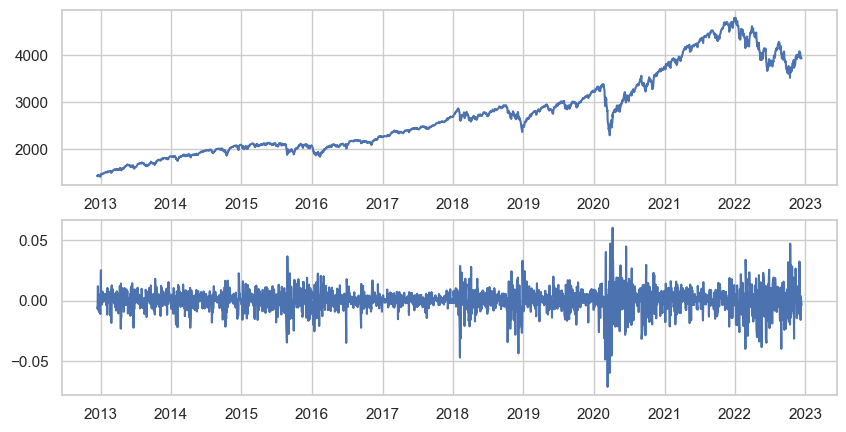

In [21]:
fig, axs = plt.subplots(2, figsize=(10, 5))
axs[0].plot(df.Open)
axs[1].plot(df.log_return)
plt.show()

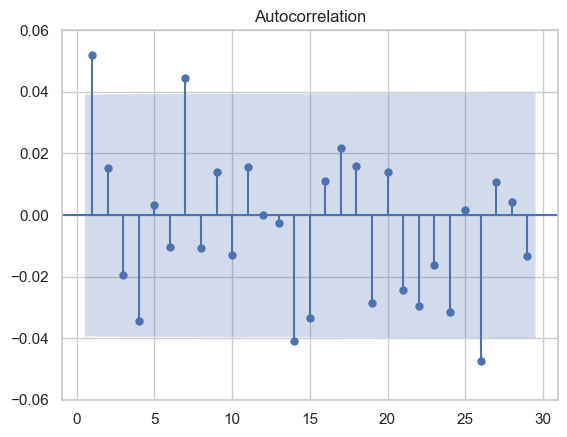

In [22]:
sm.graphics.tsa.plot_acf(df.log_return, lags=np.arange(1, 30))
plt.ylim([-0.06,0.06])
plt.show()

### CAC 40

In [23]:
df = pd.read_csv(DATA_FOLDER+'stock_market_index/'+'{}.csv'.format('CAC40'))
df = df[['Date', 'Open']]
df['Date'] = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df["log_return"] = np.log(df["Open"] / df["Open"].shift(1))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)


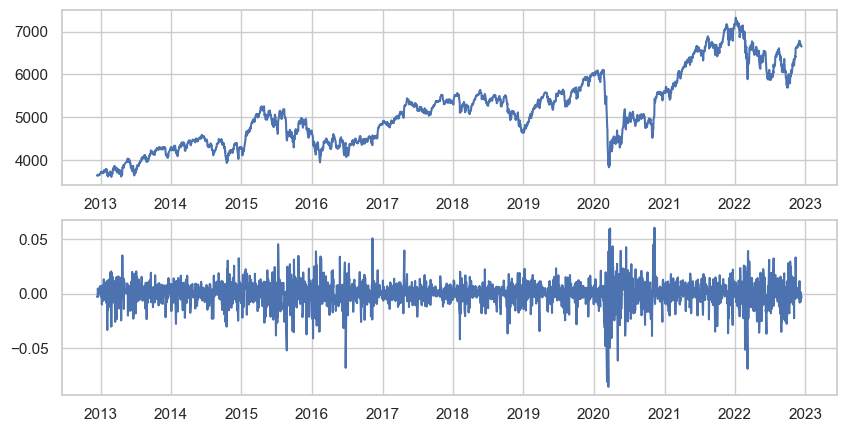

In [24]:
fig, axs = plt.subplots(2, figsize=(10, 5))
axs[0].plot(df.Open)
axs[1].plot(df.log_return)
plt.show()

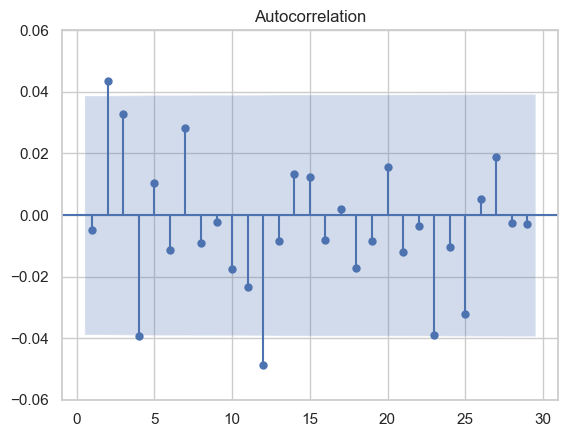

In [25]:
sm.graphics.tsa.plot_acf(df.log_return, lags=np.arange(1, 30))
plt.ylim([-0.06,0.06])
plt.show()

### SMI

In [26]:
df = pd.read_csv(DATA_FOLDER+'stock_market_index/'+'{}.csv'.format('SMI'))
df = df[['Date', 'Open']]
df['Date'] = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df["log_return"] = np.log(df["Open"] / df["Open"].shift(1))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

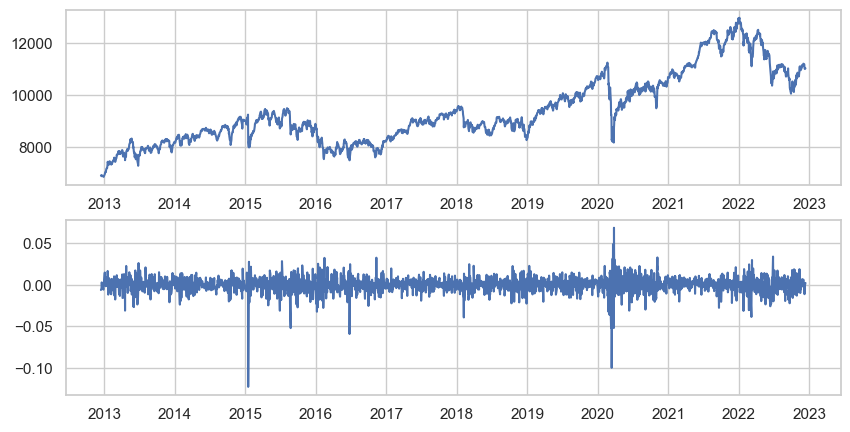

In [27]:
fig, axs = plt.subplots(2, figsize=(10, 5))
axs[0].plot(df.Open)
axs[1].plot(df.log_return)
plt.show()

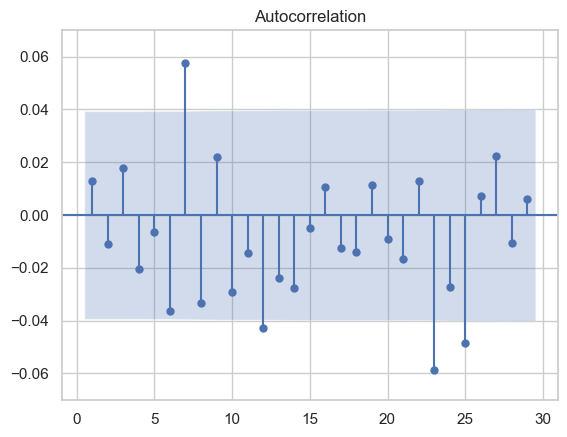

In [28]:
sm.graphics.tsa.plot_acf(df.log_return, lags=np.arange(1, 30))
plt.ylim([-0.07,0.07])
plt.show()